In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv("HRDataset_v14.csv")

In [3]:
df1.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [5]:
df1.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [6]:
df1['DateofTermination'].fillna(0)

0              0
1      6/16/2016
2      9/24/2012
3              0
4       9/6/2016
         ...    
306            0
307    9/29/2015
308            0
309            0
310            0
Name: DateofTermination, Length: 311, dtype: object

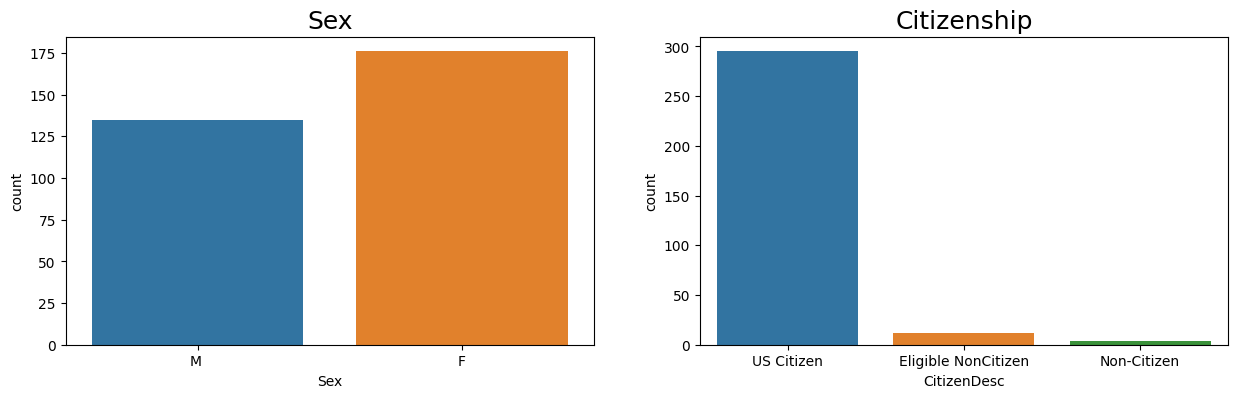

<Axes: title={'center': 'Race'}, xlabel='RaceDesc', ylabel='count'>

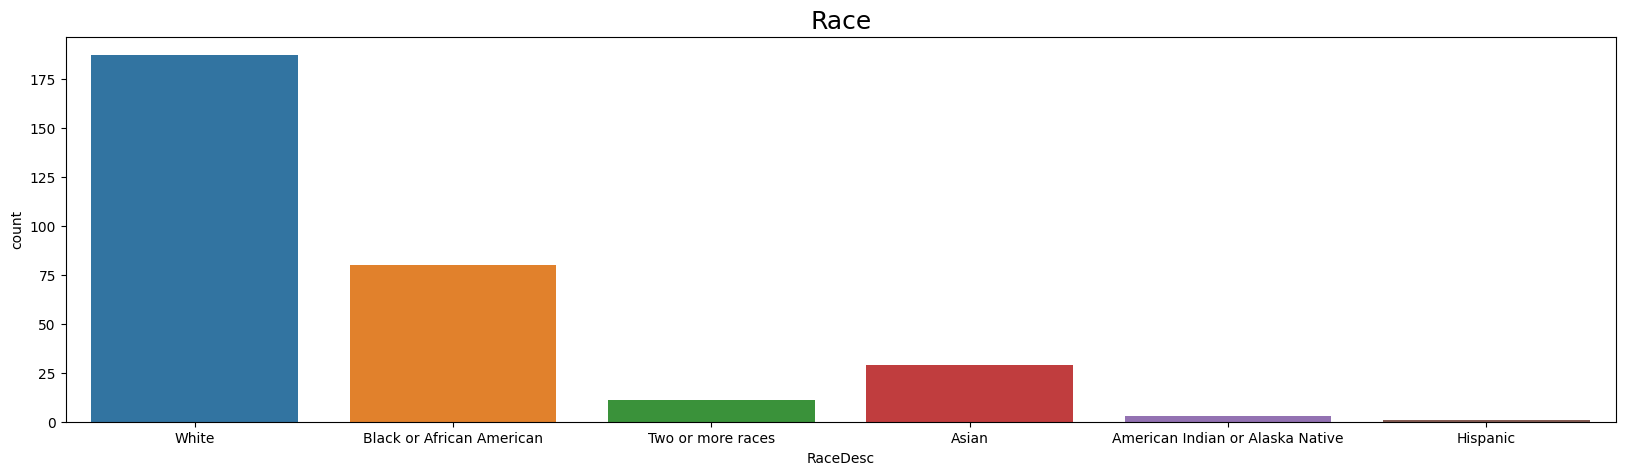

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title('Sex', fontsize=18)
sns.countplot(x = 'Sex', data = df1)

plt.subplot(122)
plt.title('Citizenship', fontsize=18)
sns.countplot(x="CitizenDesc", data = df1)

plt.show()

fig = plt.gcf()
fig.set_size_inches(20, 5)
plt.title('Race', fontsize=18)
sns.countplot(x="RaceDesc", data = df1)

# Trying to understand the diversity from the data using Sex, CitizenDesc, RaceDesc column

In [13]:
import plotly.express as px
grouped_data = df1.groupby(['Sex','Department']).size().reset_index()
grouped_data.columns = ['Sex','Department','Count']
grouped_data = grouped_data.sort_values('Count', ascending = False)
fig = px.bar(grouped_data, x = 'Department', y = 'Count', color='Sex', title = 'Numbers of Sex accross Department')
fig.show()
# Using bargraph to understand the diversity within department based on sex, citizenship, race

In [15]:
#Race/Nationality/Citizenship
grouped_data = df1.groupby(['CitizenDesc','Department']).size().reset_index()
grouped_data.columns = ['CitizenDesc','Department','Count']
grouped_data = grouped_data.sort_values('Count', ascending = False)
fig = px.bar(grouped_data, x = 'Department', y = 'Count', color='CitizenDesc', title = 'Citizenship of Empoyee accross Department')
fig.show()

In [16]:
#Race/Nationality/Citizenship
grouped_data = df1.groupby(['RaceDesc','Department']).size().reset_index()
grouped_data.columns = ['RaceDesc','Department','Count']
grouped_data = grouped_data.sort_values('Count', ascending = False)
fig = px.bar(grouped_data, x = 'Department', y = 'Count', color='RaceDesc', title = 'Race of Employee accross Department')
fig.show()

In [18]:
m = df1.groupby(['RecruitmentSource']).size().reset_index()
m.columns = ['RecruitmentSource','Distributions']
m = m.sort_values('Distributions', ascending = False)
fig = px.pie(m, values='Distributions', names='RecruitmentSource')
fig.show()

In [20]:
df1_new = df1[~(df1['TermReason'] == "N/A-StillEmployed")]

In [24]:
df1_new["TermReason"]

1               career change
2                       hours
4            return to school
10           Another position
11                    unhappy
                ...          
301                   unhappy
302          Another position
303    relocation out of area
304                  retiring
307          Another position
Name: TermReason, Length: 104, dtype: object

In [25]:
m = df1_new.groupby(['TermReason']).size().reset_index()
m.columns = ['TermReason','Distributions']
m = m.sort_values('Distributions', ascending = False)
fig = px.pie(m, values = 'Distributions', names = 'TermReason')
fig.show()

In [26]:
df2 = pd.read_csv("Airbnb Dataset 19.csv")

In [27]:
df2.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [28]:
df2.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       7
reviews_per_month                 7
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [30]:
del df2['last_review']

In [31]:
del df2['host_name']

In [33]:
df2.isnull().sum()

id                                0
name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 7
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [34]:
df2.fillna('0',inplace=True)

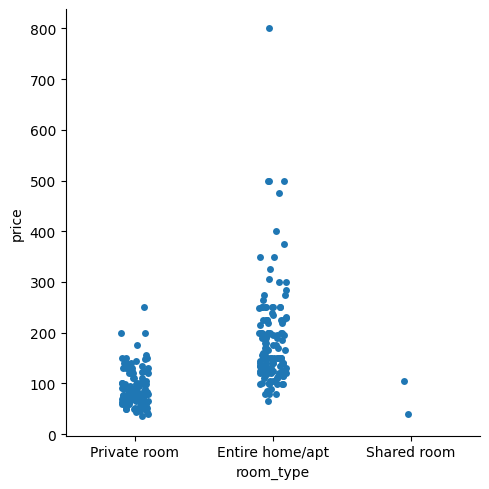

In [35]:
sns.catplot(x="room_type", y="price", data=df2)
#to get the price range of rooms based on room_type

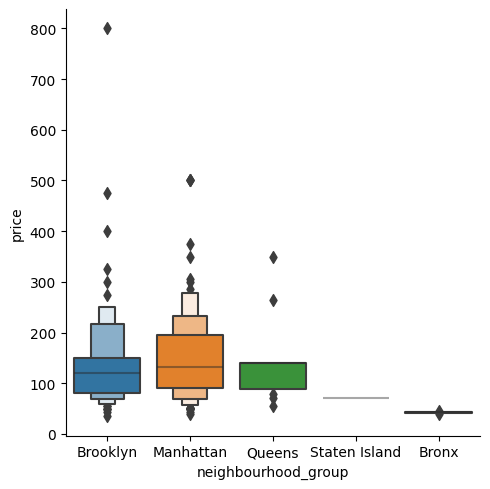

In [36]:
sns.catplot(x="neighbourhood_group", y="price", kind="boxen", data=df2)

<Axes: xlabel='neighbourhood_group', ylabel='availability_365'>

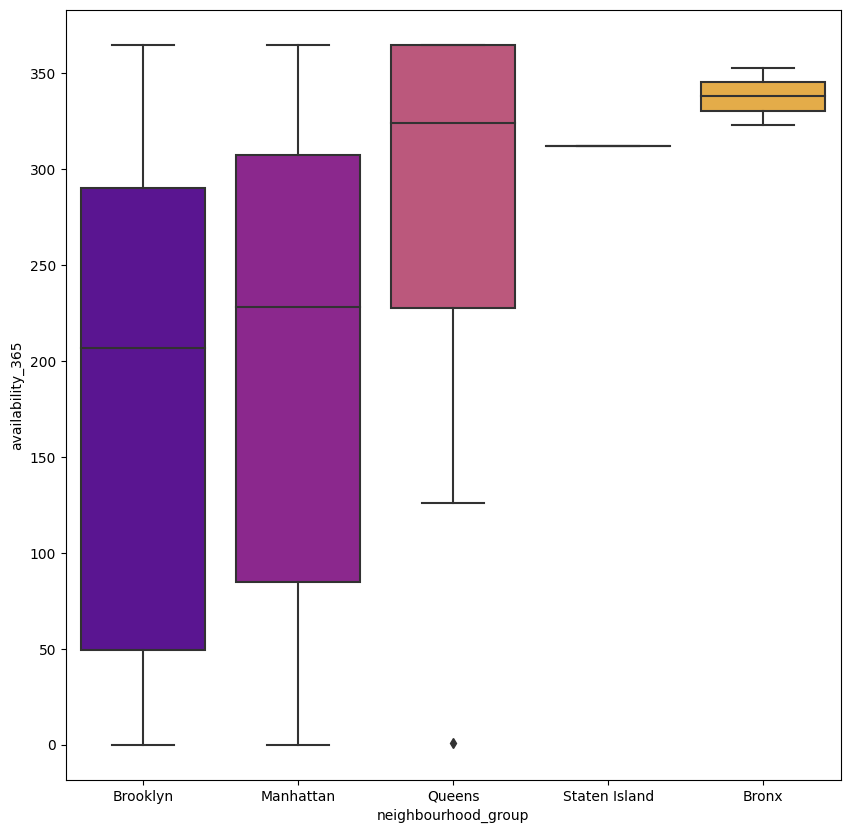

In [43]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df2, x='neighbourhood_group',y='availability_365',palette='plasma')